In [2]:
#@title Credit Card Fraud Detection using different ML Models
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#title Default title text
transactions = pd.read_csv("creditcard.csv")
transactions.shape

(138723, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138723 entries, 0 to 138722
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    138723 non-null  int64  
 1   V1      138723 non-null  float64
 2   V2      138723 non-null  float64
 3   V3      138723 non-null  float64
 4   V4      138723 non-null  float64
 5   V5      138723 non-null  float64
 6   V6      138723 non-null  float64
 7   V7      138723 non-null  float64
 8   V8      138723 non-null  float64
 9   V9      138723 non-null  float64
 10  V10     138723 non-null  float64
 11  V11     138723 non-null  float64
 12  V12     138723 non-null  float64
 13  V13     138723 non-null  float64
 14  V14     138722 non-null  float64
 15  V15     138722 non-null  float64
 16  V16     138722 non-null  float64
 17  V17     138722 non-null  float64
 18  V18     138722 non-null  float64
 19  V19     138722 non-null  float64
 20  V20     138722 non-null  float64
 21  V21     13

In [5]:
#any missing data in CSV file.
transactions.isnull().any().any()

True

In [6]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
#Display the frequency of fraudulent transactions.
#1 stands for fradulent and 0 for true.
transactions['Class'].value_counts()
transactions['Class'].value_counts(normalize = True)

0.0    0.998097
1.0    0.001903
Name: Class, dtype: float64

In [8]:
#Divide the dataset into training and testing sets.
X= transactions.drop(labels='Class',axis = 1) #Features
y=transactions.loc[:,'Class']

In [9]:
from sklearn.model_selection import train_test_split

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 )

In [11]:
X_train.shape,X_test.shape

((110978, 30), (27745, 30))

In [12]:
#to flag off warnings
X_train.is_copy = False
X_test.is_copy = False

In [13]:
X_train['Time'].describe()

count    110978.000000
mean      51524.472211
std       20765.795624
min           0.000000
25%       37742.250000
50%       53316.000000
75%       68884.000000
max       82809.000000
Name: Time, dtype: float64

In [14]:
#convert seconds to hours for easy of calculations

X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
# time of last transaction in days
X_train['Time'].max() / 24

0.9584375

Text(0.5, 1.0, 'Transaction times')

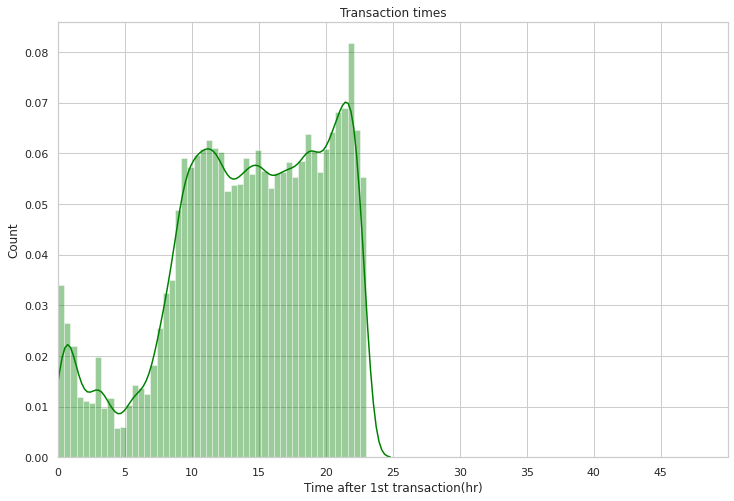

In [16]:
#histogram of transition times. 
plt.figure(figsize=(12,8))
sns.distplot(X_train['Time'],bins=50,color='green')
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Time after 1st transaction(hr)')
plt.ylabel('Count')
plt.title('Transaction times')

In [17]:
#Summary stats
X_train['Amount'].describe()

count    110978.000000
mean         91.114128
std         248.925923
min           0.000000
25%           6.040000
50%          24.000000
75%          81.400000
max       19656.530000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

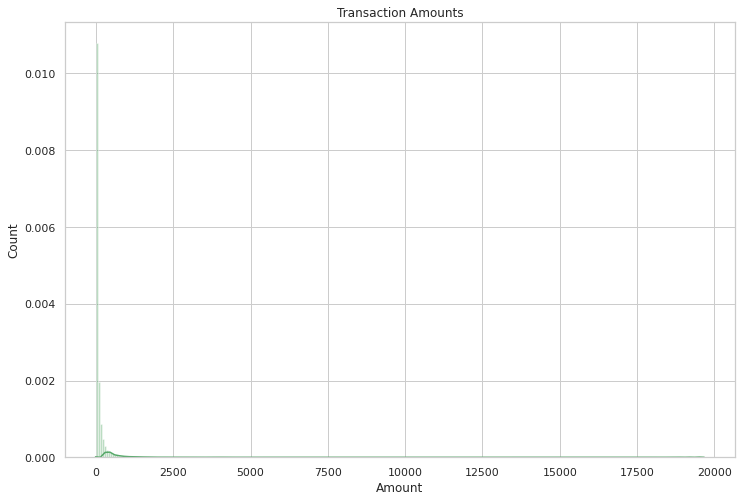

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],bins=300,color='g')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

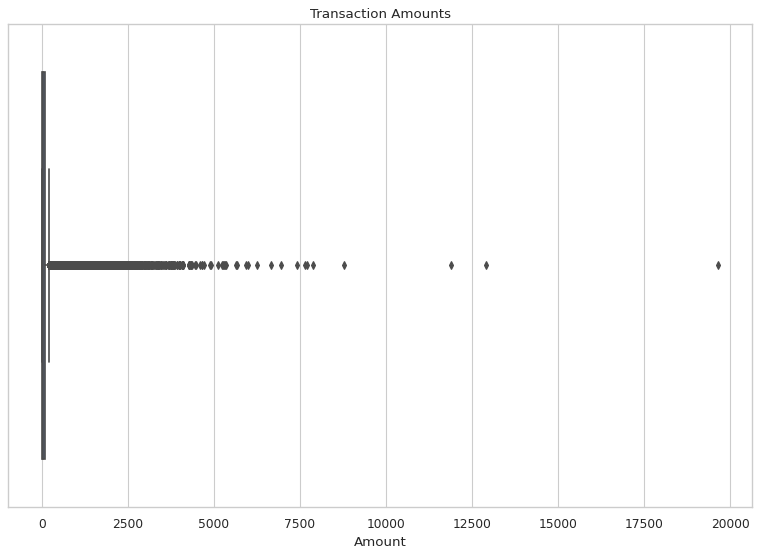

In [19]:
# box plot as the histogram doesnot shoe the details properly.
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [20]:
#There are no outliers in the left and right side. Thus the amounts were roght skewed. We can check for the skewness to be sure.
X_train['Amount'].skew()

14.853514710212442

In [21]:
#Lets remove the skewness and convert the data into a normal distribution.
X_train.loc[:,'Amount'] = X_train['Amount']+ 1e-9
# Shift all amounts by 1e-9

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [22]:
#Performing Box-Cox Transform
from scipy import stats
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [23]:
#The maximum likelihood estimate of  λ  in the Box-Cox transform:
X_train.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6416,2.112222,-0.579407,1.077787,1.144442,0.211623,0.089719,-0.082715,0.244582,-0.779873,1.155619,-0.466510,1.461788,-2.385504,0.589653,1.898801,-1.054271,0.847999,-0.424020,1.009029,-0.933058,-0.523172,0.746122,-0.166619,0.222070,-0.128374,-1.119085,-0.873798,0.133880,0.227674,4.626681
131847,22.155556,-0.796451,1.168320,2.556739,1.482790,0.171231,-0.119503,0.596376,0.110528,-1.260546,-0.120176,0.047595,0.457022,1.064661,-0.243722,0.201451,0.581795,-0.601024,-0.569887,-2.323584,-0.099671,0.309692,0.862156,-0.167921,0.626001,-0.026517,-0.061838,0.099567,0.119899,2.786063
48260,12.101944,-1.356854,-0.869201,2.351777,1.375260,-0.437263,0.226132,0.638936,-0.004719,0.082473,-0.453638,-0.161668,0.249634,0.362283,-0.465826,1.041903,-0.581734,0.129288,-0.017531,-0.131974,0.874331,0.449217,0.981200,0.570880,0.395616,-0.091464,-0.233710,-0.081466,-0.046018,8.517421
29018,9.800000,-1.393597,1.681408,0.839188,-0.069889,-0.755144,-0.802991,-0.080925,0.904123,-0.879668,-0.296599,1.284979,1.269683,0.473199,0.825856,0.024220,0.541300,-0.267185,0.082304,0.183735,0.033585,-0.105530,-0.455356,0.095960,0.524330,-0.139512,0.049175,0.129844,0.037339,2.705796
91145,17.591944,-1.324390,-0.885442,1.343601,-0.986370,-0.951576,2.626739,1.224065,0.260631,0.699102,-0.756308,1.930403,1.072568,-0.153408,-0.642523,0.141727,-0.599747,0.375800,-1.784161,-1.637220,-0.589387,-0.049468,0.767070,0.607706,-0.938774,-0.795593,0.866369,-0.038407,-0.352587,9.111353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,8.988333,1.198567,0.231864,0.013675,0.559377,-0.187499,-1.225223,0.511650,-0.359399,-0.259776,-0.089030,-0.135563,0.519834,0.483627,0.402407,0.718036,0.013442,-0.275740,-0.925099,0.093536,0.016065,-0.352293,-1.129664,0.102340,0.394615,0.285621,0.132103,-0.069447,0.018187,5.206198
93425,17.892500,1.132385,-0.078623,1.169253,1.147070,-0.744403,0.320612,-0.656691,0.248806,0.626279,-0.038234,0.642206,1.160559,0.194972,-0.220299,-0.518214,0.362934,-0.630809,0.518802,0.202384,-0.098817,-0.030121,0.092718,-0.060694,0.013331,0.435522,-0.406706,0.069326,0.025289,2.705796
32071,10.173611,-0.331117,-0.803954,2.621537,0.135367,-1.999166,0.672304,-0.148524,-0.027839,-0.263903,0.360268,-0.911855,-0.794678,0.088275,-1.349665,-0.043116,-0.001709,1.213313,-0.821462,2.587050,0.813020,0.337820,1.114503,0.202842,0.444937,-0.256014,0.097805,-0.008254,-0.066275,7.763917
29676,9.883333,-2.020208,-2.207684,1.915390,-0.696352,-1.174161,-0.971853,0.349882,0.068903,1.181725,-1.663291,-0.377120,-0.225768,-1.098700,0.088686,1.919749,-0.904936,0.520083,0.730586,1.665583,1.272979,0.523459,0.609655,0.862564,0.723423,0.407911,0.265691,-0.080566,0.136544,9.319132


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

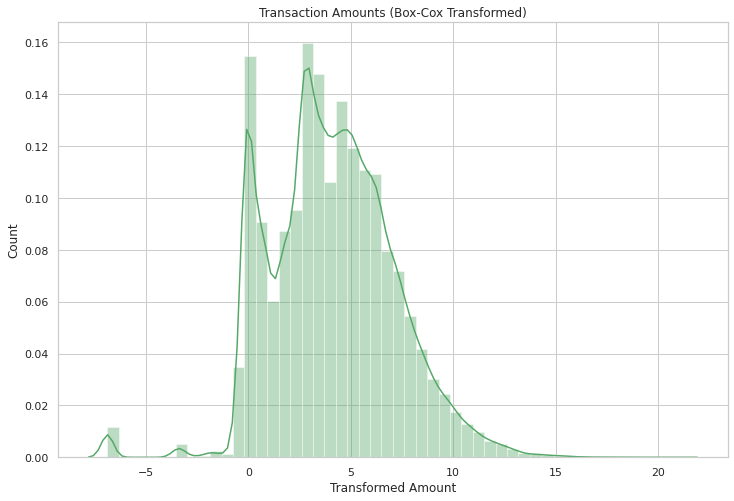

In [24]:
#plotting newly transformed accounts
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],color='g')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [25]:
X_train['Amount'].describe()

count    110978.000000
mean          4.090098
std           2.999090
min          -6.872396
25%           2.039325
50%           3.982273
75%           6.037025
max          20.981474
Name: Amount, dtype: float64

In [26]:
X_train['Amount'].skew()

0.10558382429872074

In [27]:
#So our power transform removed most of the skewness in the Amount variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the  λ  value estimated on the training data.

In [28]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


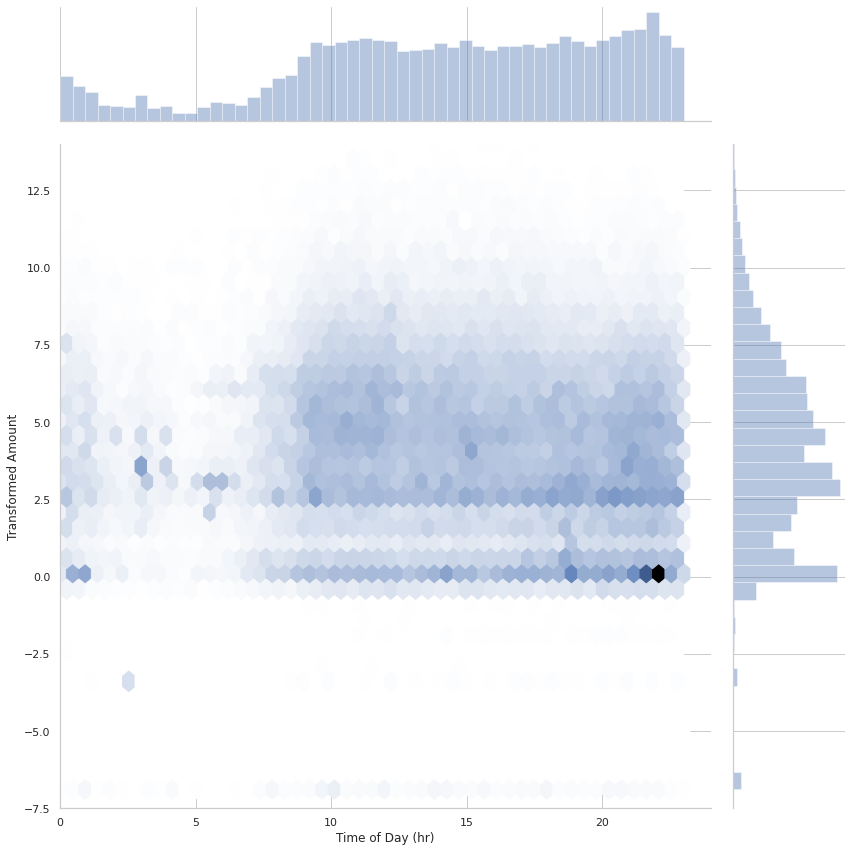

In [29]:
#Time vs Amount
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

In [30]:
#Let's compare the descriptive stats of the PCA variables V1-V28.
pca_vars = ['V%i' % k for k in range(1,29)]

In [31]:
#Full Table descriptive stats

In [32]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000,110978.000000
mean,-0.247447,0.017761,0.674585,0.142363,-0.285703,0.075094,-0.118442,0.066389,-0.093358,-0.020376,0.212802,0.023904,-0.016744,0.030511,0.223728,-0.008498,0.045978,-0.085299,-0.019866,0.042051,-0.038885,-0.118247,-0.033656,0.010332,0.130604,0.023488,0.000608,0.002062
std,1.800440,1.596070,1.264933,1.324206,1.298370,1.277523,1.159705,1.217532,1.090714,1.051626,1.050373,1.025799,1.000228,0.924295,0.926508,0.881816,0.888216,0.834725,0.810099,0.717070,0.719933,0.635168,0.593980,0.594507,0.436892,0.492777,0.385193,0.290561
min,-36.802320,-63.344698,-33.680984,-5.519697,-42.147898,-23.496714,-26.548144,-50.943369,-9.283925,-18.271168,-4.049895,-17.769143,-4.008640,-19.214325,-4.092344,-13.563273,-25.162799,-9.287832,-7.213527,-19.902611,-22.757540,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896
25%,-1.020987,-0.565574,0.172459,-0.712465,-0.907540,-0.661623,-0.604645,-0.130997,-0.717414,-0.492237,-0.546758,-0.376644,-0.674559,-0.343418,-0.315253,-0.476620,-0.406911,-0.552361,-0.510131,-0.169935,-0.225903,-0.547445,-0.172113,-0.325336,-0.135337,-0.326333,-0.060433,-0.004243
50%,-0.267793,0.102681,0.751836,0.167898,-0.316536,-0.176699,-0.066459,0.080334,-0.156208,-0.098498,0.131074,0.163840,-0.018626,0.061087,0.334712,0.069585,-0.020162,-0.084230,-0.019711,-0.027362,-0.059719,-0.095002,-0.045134,0.067447,0.167357,-0.066500,0.011781,0.023554
75%,1.157841,0.774762,1.363317,0.997952,0.235653,0.459720,0.408038,0.373174,0.482985,0.425866,1.034312,0.652266,0.646465,0.454489,0.891918,0.533185,0.432472,0.387492,0.478125,0.164200,0.113611,0.301089,0.082799,0.407330,0.419534,0.289722,0.086924,0.076897
max,1.960497,18.902453,9.382558,16.715537,34.099309,22.529298,36.677268,19.168327,15.594995,23.745136,12.018913,4.846452,4.465413,7.692209,4.803689,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,7.357255,19.002942,4.022866,5.525093,3.517346,12.152401,15.374949


Text(0.5, 1.0, 'V1-V28 Means')

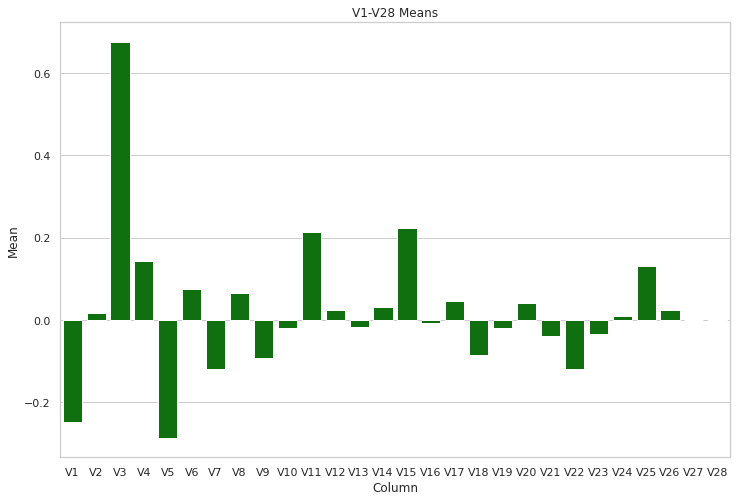

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [40]:
#All of V1-V28 have approximately zero mean. Now plot the standard deviations:

Text(0.5, 1.0, 'V1-V28 Means')

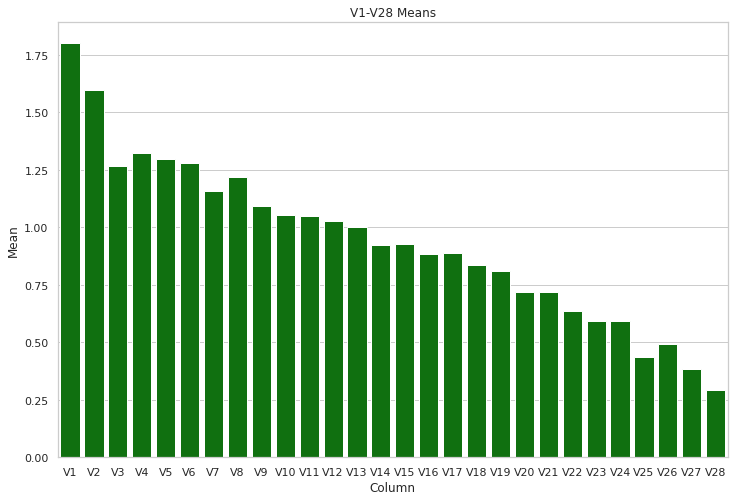

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Means')

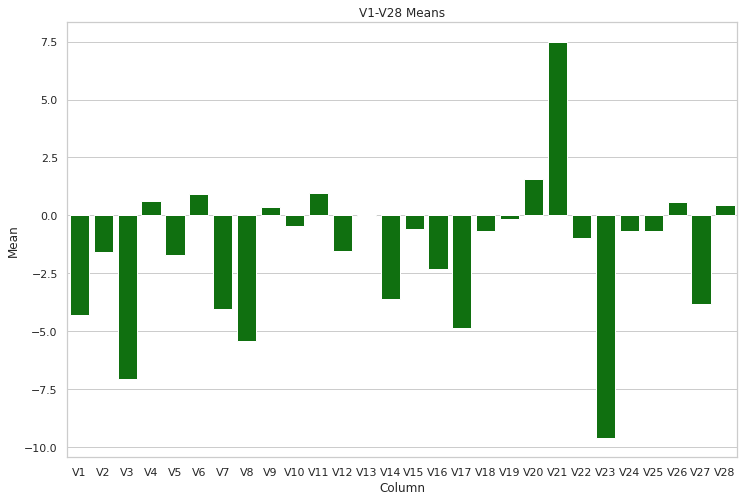

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [42]:
#The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9. Plot the skewnesses next:

In [44]:
#A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.

Text(0.5, 1.0, 'V8')

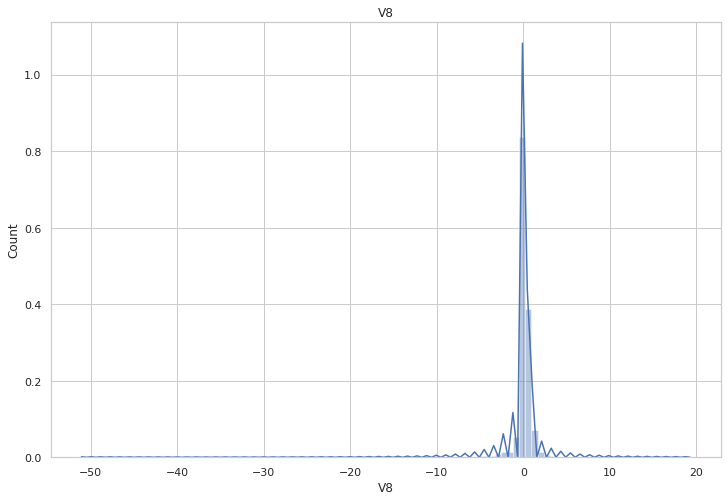

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['V8'], bins=100)
plt.ylabel('Count')
plt.title('V8')

In [46]:
#boxplot:

Text(0.5, 1.0, 'V8')

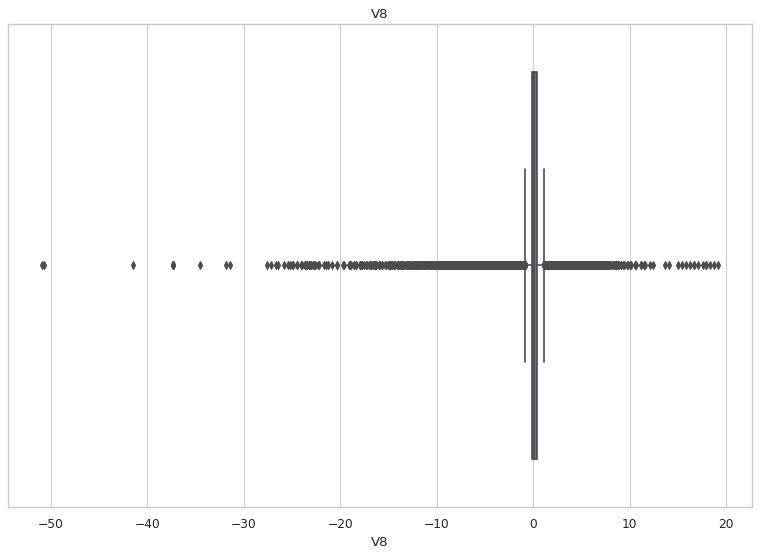

In [36]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

In [48]:
#The kurtosis method

Text(0.5, 1.0, 'V1-V28 Kurtoses')

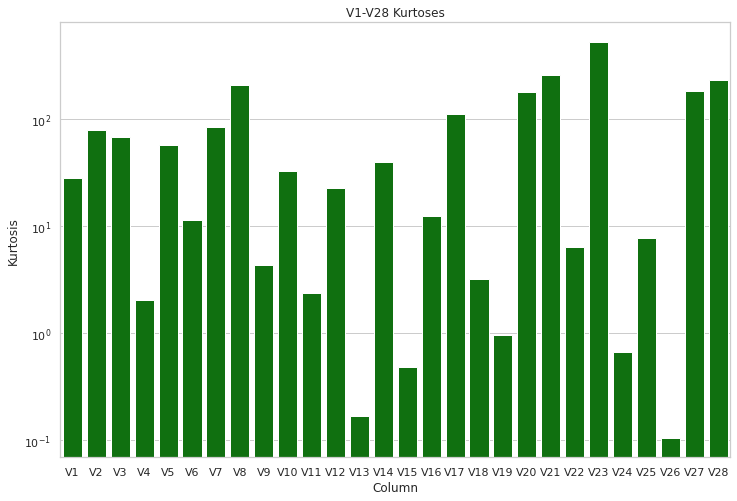

In [37]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='green')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

In [50]:
#plot the medians:

Text(0.5, 1.0, 'V1-V28 Means')

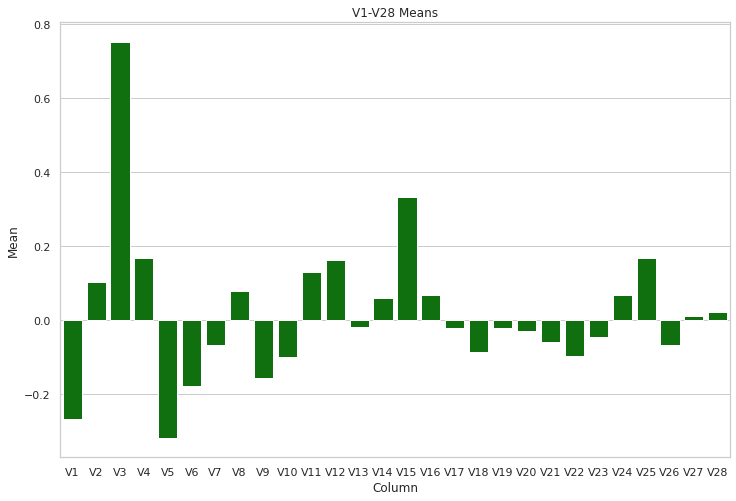

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')


In [52]:
 #the interquartile ranges (IQR)*:

Text(0.5, 1.0, 'V1-V28 IQRs')

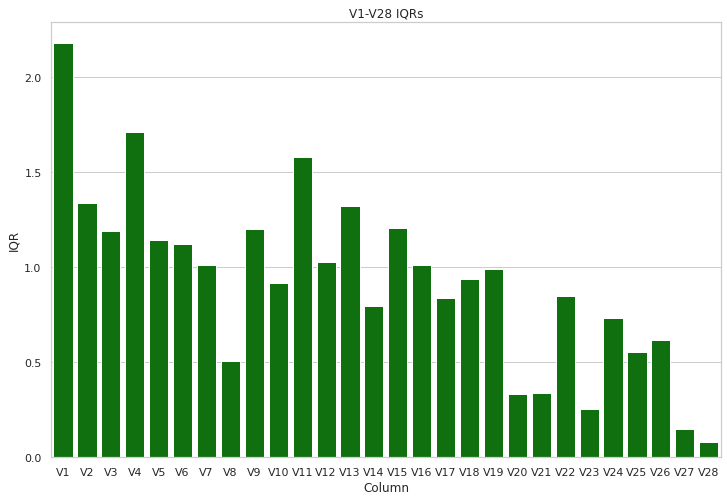

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='green')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [54]:
#Logistic Regression


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [41]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [42]:
#one grid for the linear SVC and one for logistic regression:

In [43]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [45]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [46]:
#Perform the grid search:

In [68]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             return_train_score=True, scoring=make_scorer(matthews_corrcoef),
             verbose=1)

In [54]:
!pip install -U scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [55]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [56]:
param_grid_rf = {'model__n_estimators': [75]}

In [62]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=True)

In [63]:
#Test Set Evaluation of the Best Model
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [69]:
def classification_eval(estimator,X_test,y_test):
    y_pred=estimator.predict(X_test)
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred),'\n')
    
    print('Classification report')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print("Scalar Metrics")
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [71]:
#pycaret library.

In [73]:
!pip install pycaret

In [74]:
from pycaret.classification import *

In [75]:
clf=setup(transactions,target="Class")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1667
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(138723, 31)"
4,Missing Values,True
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [92]:
!pip install -U scikit-learn scipy statsmodels

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.5.0)
Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [94]:
from scipy.special import logsumexp

In [79]:
et=create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9996,1.0000,0.9231,0.8571,0.8889,0.8887
1,0.9993,0.9601,0.6923,0.9000,0.7826,0.7822
2,0.9996,0.9195,0.7692,1.0000,0.8696,0.8693
3,0.9996,0.9996,0.8333,0.9091,0.8696,0.8693
4,0.9991,0.8811,0.6154,0.8889,0.7273,0.7268
5,0.9994,0.9209,0.7692,0.9091,0.8333,0.8330
6,0.9997,0.9604,0.8462,1.0000,0.9167,0.9165
7,0.9997,0.9602,0.8462,1.0000,0.9167,0.9165
8,0.9991,0.9207,0.6923,0.8182,0.7500,0.7496
9,0.9994,0.9592,0.6923,1.0000,0.8182,0.8179


In [80]:
print(et)

ExtraTreesClassifier(random_state=1667)


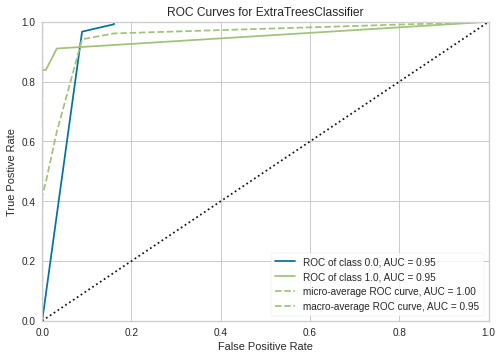

In [83]:
#ROC Curve:
plot_model(et)

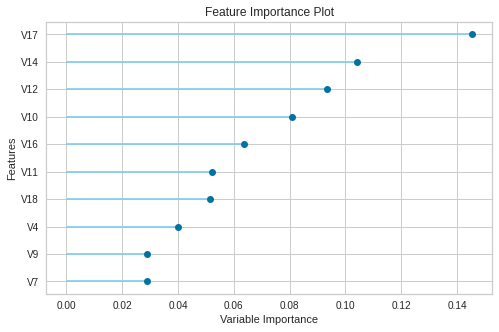

In [84]:
plot_model(et, plot='feature')

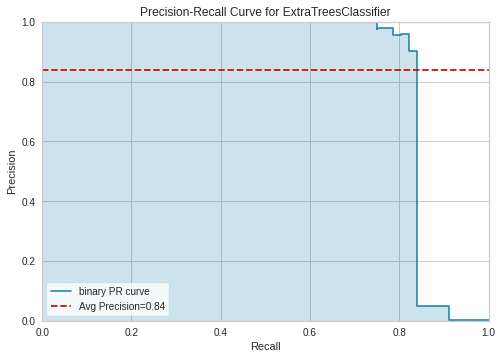

In [85]:
#Precision Curve
plot_model(et, plot = 'pr')

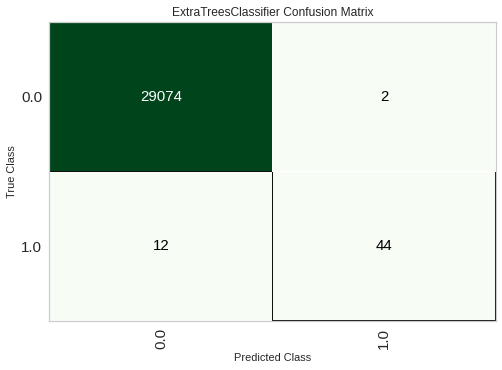

In [86]:
#Confusion Matrix
plot_model(et, plot = 'confusion_matrix')

In [88]:
#Model Evaluation:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [91]:
#Prediction:
predict_model(et); #Accuracy: 99%

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9995,0.9524,0.7857,0.9565,0.8627,0.8625


In [95]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.999500,0.971400,0.791000,0.923100,0.847800,0.847500
1,CatBoost Classifier,0.999500,0.967000,0.760300,0.962100,0.847200,0.846900
2,Random Forest Classifier,0.999400,0.925900,0.698100,0.952700,0.801200,0.800900
3,Extra Trees Classifier,0.999400,0.948200,0.767900,0.928200,0.837300,0.837000
4,Ada Boost Classifier,0.999300,0.955700,0.751900,0.869500,0.801400,0.801100
5,Linear Discriminant Analysis,0.999200,0.975400,0.767900,0.823500,0.787700,0.787400
6,Decision Tree Classifier,0.999100,0.874800,0.750000,0.778600,0.754400,0.753900
7,Gradient Boosting Classifier,0.999000,0.777200,0.645500,0.836500,0.686700,0.686300
8,Logistic Regression,0.998600,0.901100,0.478200,0.674100,0.548900,0.548200
9,Ridge Classifier,0.998600,0.000000,0.410300,0.721900,0.514000,0.513300


In [96]:
#find the number of fraud and valid transactions dataset.

fraud = transactions[transactions['Class']==1]
normal = transactions[transactions['Class']==0]
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (264, 31)
Shape of Non-Fraudulant transactions: (138458, 31)


In [97]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,264.000000,138458.000000
mean,115.387008,91.326355
std,245.189867,247.818289
min,0.000000,0.000000
25%,1.000000,6.040000
50%,9.560000,23.990000
75%,99.990000,81.000000
max,1809.680000,19656.530000


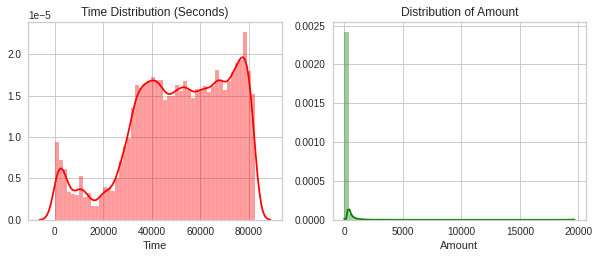

In [100]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(transactions['Time'], color='red');


plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(transactions['Amount'],color='green');

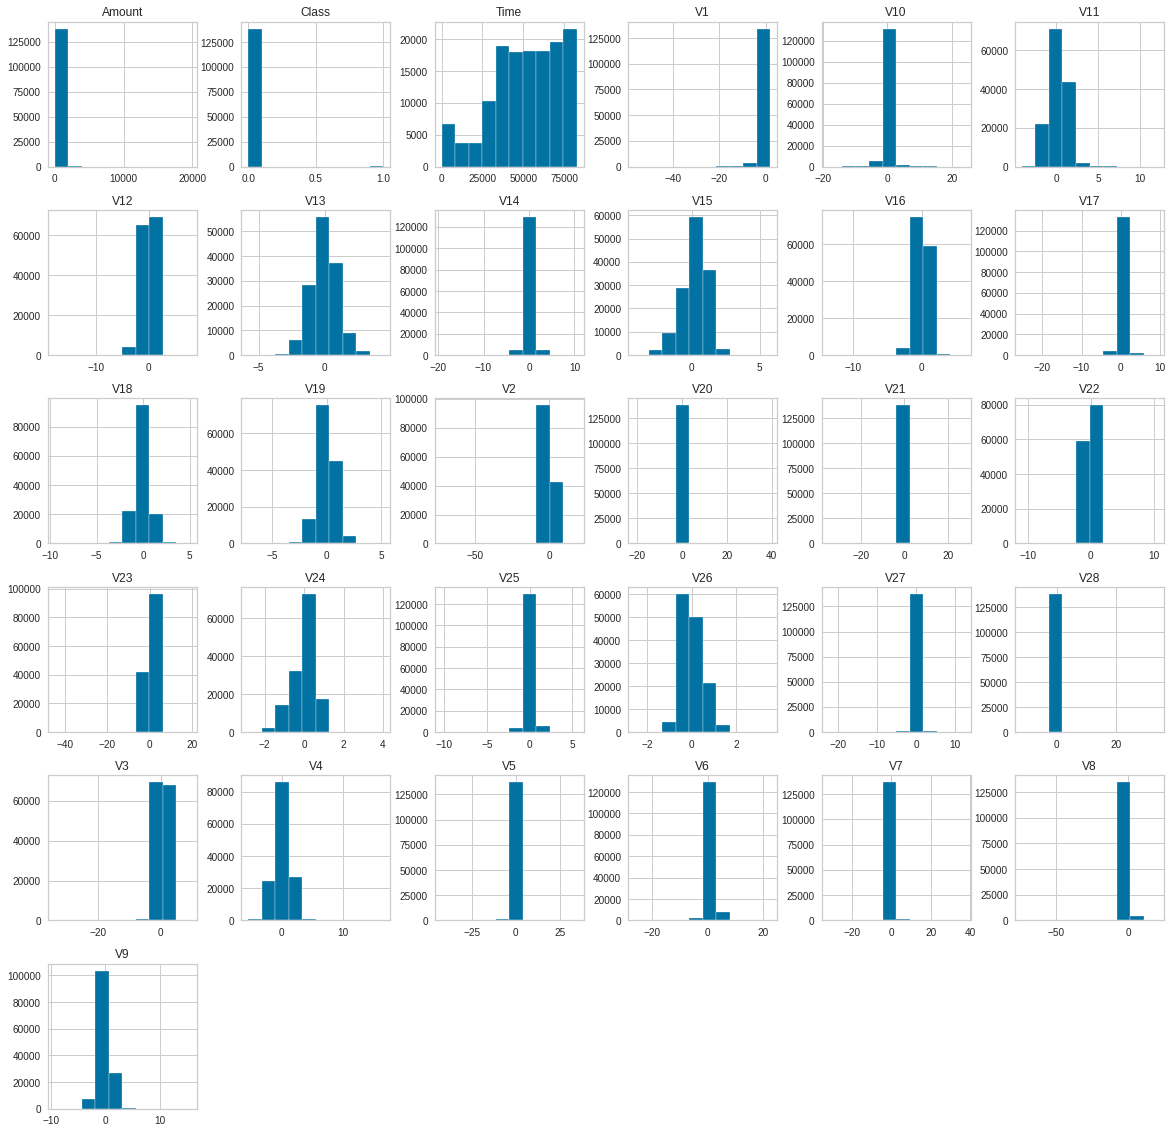

In [102]:
#out modelling and prediction
transactions.hist(figsize=(20, 20));

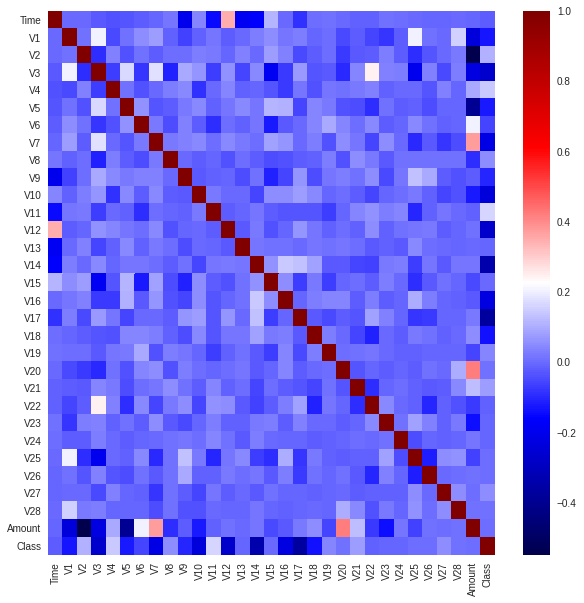

In [104]:
# heatmap for high correlations
plt.figure(figsize=(10,10))
sns.heatmap(data=transactions.corr(), cmap="seismic")
plt.show();

In [105]:
#Highest correlations come from:
#Time & V3 (-0.42)
#Amount & V2 (-0.53)
#Amount & V4 (0.4)